In [206]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from typing import Callable

In [207]:
def sum(data: list[float]) -> float:
    result = 0
    for item in data:
        result += item
    return result

In [208]:
def average(data: list[float]) -> float:
    return (1 / len(data)) * sum(data)

In [209]:
def list_map(l: list[float], predicate: Callable[[float], float]) -> list[float]:
    return [predicate(i) for i in l]

def inversion(x: float) -> float:
    return 1 / x

def i(x: float) -> float:
    return x

In [210]:
def standard_deviation(data: list[float]) -> float:
    deviations = []
    mean = average(data)
    for item in data:
        deviations.append(math.pow(item - mean, 2))
    deviations_sum = sum(deviations)
    return math.sqrt(deviations_sum / (len(data)))

In [211]:
def standard_deviation_from_the_mean(data: list[float]) -> float:
    return standard_deviation(data) / math.sqrt(len(data))

In [212]:
from ctypes import ArgumentError

def mmq_sigma_square(y_errors: list[float]) -> float:
    items_to_sum = [1 / i ** 2 for i in y_errors]
    return sum(items_to_sum)

def mmq_x(xs: list[float], y_errors: list[float]) -> float:
    if (len(xs) != len(y_errors)):
        raise ArgumentError(xs)
    items_to_sum = []
    for xi, y_error_i in zip(xs, y_errors):
        items_to_sum.append(xi / y_error_i ** 2)
    return (1 / mmq_sigma_square(y_errors)) * sum(items_to_sum)

def mmq_x_square(xs: list[float], y_errors: list[float]) -> float:
    if (len(xs) != len(y_errors)):
        raise ArgumentError(xs)
    items_to_sum = []
    for xi, y_error_i in zip(xs, y_errors):
        items_to_sum.append((xi ** 2) / (y_error_i ** 2))
    return (1 / mmq_sigma_square(y_errors)) * sum(items_to_sum)

def mmq_y(ys: list[float], y_errors: list[float]) -> float:
    if (len(ys) != len(y_errors)):
        raise ArgumentError(ys, y_errors)
    items_to_sum = []
    for yi, y_error_i in zip(ys, y_errors):
        items_to_sum.append(yi / y_error_i ** 2)
    return (1 / mmq_sigma_square(y_errors)) * sum(items_to_sum) 

def mmq_xy(xs: list[float], ys: list[float], y_errors: list[float]) -> float:
    if (not (len(xs) == len(ys) and len(ys) == len(y_errors))):
        raise ArgumentError(ys, xs, y_errors)
    items_to_sum = []
    for xi, yi, y_error_i in zip(xs, ys, y_errors):
        items_to_sum.append((xi * yi) / y_error_i ** 2)
    return (1 / mmq_sigma_square(y_errors)) * sum(items_to_sum)

def mmq_a(xs: list[float], ys: list[float], y_errors: list[float]) -> float:
    x = mmq_x(xs, y_errors)
    y = mmq_y(ys, y_errors)
    xy = mmq_xy(xs, ys, y_errors)
    x_square = mmq_x_square(xs, y_errors)
    return (x * y - xy) / (x ** 2 - x_square)

def mmq_b(xs: list[float], ys: list[float], y_errors: list[float]) -> float:
    return mmq_y(ys, y_errors) - mmq_a(xs, ys, y_errors) * mmq_x(xs, y_errors)

def mmq_delta_a(xs: list[float], y_errors: list[float]) -> float:
    sigma_square = mmq_sigma_square(y_errors)
    x = mmq_x(xs, y_errors)
    x_square = mmq_x_square(xs, y_errors)
    return math.sqrt((1 / sigma_square) / (x_square - x ** 2))

def mmq_delta_b(xs: list[float], y_errors: list[float]) -> float:
    sigma_square = mmq_sigma_square(y_errors)
    x = mmq_x(xs, y_errors)
    x_square = mmq_x_square(xs, y_errors)
    return math.sqrt((x_square / sigma_square) / (x_square - x ** 2))

def alternative_mmq_a(xs: list[float], ys: list[float]) -> float:
    x_average = average(xs)
    y_average = average(ys)
    y_sum = [yi - y_average for yi in ys]
    x_sum = [xi - x_average for xi in xs]
    return sum([xi * yi for xi, yi in zip(x_sum, y_sum)])/sum([xi ** 2 for xi in x_sum])

In [213]:
import numpy as np
import matplotlib.pyplot as plt

def draw_polynomial_interpolation_curve(xs: list[float], ys: list[float], degree: int) -> None:
    x = np.array(xs)
    y = np.array(ys)
    p = np.polyfit(x, y, degree)
    yfit = np.polyval(p, x)
    p1 = np.polyder(p)
    p2 = np.polyder(p1)
    inflexion_points = sorted(np.roots(p2))
    inflexion_values = [p for p in np.polyval(p, inflexion_points)]
    print(f"Coeficientes: {p}")
    print(f"Raízes: {np.roots(p)}")
    print(f"Pontos de inflexão: {inflexion_points}")
    print(f"Valores de p nos pontos de inflexão: {inflexion_values}")
    plt.plot(x, y, 'o', label='Dados originais')
    plt.plot(x, yfit, '-', label='Polinômio ajustado')
    plt.legend()
    plt.show()
    

In [214]:
## Relatório 2 - FEMEC

def erro_dos_intervalos(comprimentos: list[float]) -> float:
    return math.sqrt(standard_deviation_from_the_mean(comprimentos) ** 2 + 0.05 ** 2)

def erro_cronometro(tempos: list[float]) -> float:
    return math.sqrt(standard_deviation_from_the_mean(tempos) ** 2 + 0.01 ** 2)

def erro_velocidade(l: float, erroL: float, t: float, erroT: float) -> float:
    return (l / t) * math.sqrt((erroL / l) ** 2 + (erroT / t) ** 2)
    
def row_tabela_2(intervalo: str, comprimentos: list[float], tempos: list[float]) -> None:
    print(intervalo)
    mediaComprimentos = average(comprimentos)
    incertezaComprimentos = erro_dos_intervalos(comprimentos)
    mediaTempos = average(tempos)
    incertezaTempos = erro_cronometro(tempos)
    v = mediaComprimentos / mediaTempos
    erroV = erro_velocidade(mediaComprimentos, incertezaComprimentos, mediaTempos, incertezaTempos)
    print(f"Média de comprimento = {mediaComprimentos} +- {incertezaComprimentos}")
    print(f"Média de tempo = {mediaTempos} +- {incertezaTempos}")
    print(f"Velocidade Média: {v} +- {erroV}")
    
def tabela_3_row(sensor: str, medidas_sensores: list[tuple[list[float], list[float]]]) -> None:
    media_comprimento = erro_comprimento = media_tempo = erro_tempo = tempo_square = erro_tempo_square = 0
    for medidas in medidas_sensores:
        (comprimentos, tempos) = medidas
        media_comprimento += average(comprimentos)
        erro_comprimento += erro_comprimento + erro_dos_intervalos(comprimentos) ** 2
        media_tempo += average(tempos)
        erro_tempo += erro_tempo + erro_cronometro(tempos) ** 2
        tempo_square = media_tempo ** 2
        erro_tempo_square += erro_tempo_square + (2 * erro_cronometro(tempos) / average(tempos)) ** 2
    erro_comprimento = math.sqrt(erro_comprimento)
    erro_tempo = math.sqrt(erro_tempo)
    erro_tempo_square = math.sqrt(erro_tempo_square)
    print(f"Sensor {sensor}")
    print(f"Xm = {round(media_comprimento, 3)}, Erro Xm = {round(erro_comprimento, 3)}, tm = {round(media_tempo, 3)}, Erro tm = {round(erro_tempo, 3)}, tm2 = {round(tempo_square, 3)}, Erro tm2 = {round(erro_tempo_square, 3)}")
        
l1_medidas = [15.3, 13.7, 11.5]
t1_medidas = [0.735, 0.727, 0.708]
l2_medidas = [20.0, 18.8, 16.2]
t2_medidas = [0.398, 0.398, 0.398]
l3_medidas = [19.5, 17.9, 16.21]
t3_medidas = [0.300, 0.299, 0.299]
l4_medidas = [19.4, 17.8, 16.0]
t4_medidas = [0.243, 0.244, 0.243]

row_tabela_2("L1", l1_medidas, t1_medidas)
print()
row_tabela_2("L2", l2_medidas, t2_medidas)
print()
row_tabela_2("L3", l3_medidas, t3_medidas)
print()
row_tabela_2("L4", l4_medidas, t4_medidas)
print()

tabela_3_row('1', [(l1_medidas, t1_medidas)])
print()
tabela_3_row('2', [(l1_medidas, t1_medidas), (l2_medidas, t2_medidas)])
print()
tabela_3_row('3', [(l1_medidas, t1_medidas), (l2_medidas, t2_medidas), (l3_medidas, t3_medidas)])
print()
tabela_3_row('4', [(l1_medidas, t1_medidas), (l2_medidas, t2_medidas), (l3_medidas, t3_medidas), (l4_medidas, t4_medidas)])
print()

ys = [13, 32, 49, 67.0]
xs = [0.5, 1.2, 2, 3]
y_errors = [1.0, 2.0, 4.0, 5.0]
print(f"Sigma square: {mmq_sigma_square(y_errors)}")
print(f"X: {mmq_x(xs, y_errors)}")
print(f"X square: {mmq_x_square(xs, y_errors)}")
print(f"Y: {mmq_y(ys, y_errors)}")
print(f"XY: {mmq_xy(xs, ys, y_errors)}")
print(f"a: {mmq_a(xs, ys, y_errors)}")
print(f"b: {mmq_b(xs, ys, y_errors)}")
print(f"deltaA: {mmq_delta_a(xs, y_errors)}")
print(f"deltaB: {mmq_delta_b(xs, y_errors)}")

L1
Média de comprimento = 13.5 +- 0.9007712744581107
Média de tempo = 0.7233333333333333 +- 0.011947415651124758
Velocidade Média: 18.663594470046085 +- 1.2828939906276242

L2
Média de comprimento = 18.333333333333332 +- 0.9170706180652168
Média de tempo = 0.39799999999999996 +- 0.01
Velocidade Média: 46.06365159128978 +- 2.5785365080630784

L3
Média de comprimento = 17.869999999999997 +- 0.7771672206731887
Média de tempo = 0.2993333333333333 +- 0.010003703018086556
Velocidade Média: 59.69933184855234 +- 3.2743748497494405

L4
Média de comprimento = 17.733333333333334 +- 0.8034070966595718
Média de tempo = 0.24333333333333332 +- 0.010003703018086556
Velocidade Média: 72.87671232876713 +- 4.458398225480791

Sensor 1
Xm = 13.5, Erro Xm = 0.901, tm = 0.723, Erro tm = 0.012, tm2 = 0.523, Erro tm2 = 0.033

Sensor 2
Xm = 31.833, Erro Xm = 1.57, tm = 1.121, Erro tm = 0.02, tm2 = 1.257, Erro tm2 = 0.069

Sensor 3
Xm = 49.703, Erro Xm = 2.352, tm = 1.421, Erro tm = 0.03, tm2 = 2.018, Erro tm2 =

Coeficientes: [-1.28797321e-18 -3.56311381e-17 -1.74275206e-16  3.04807797e-15
  2.81637098e-14 -7.06431966e-15  2.54228669e-13  6.31781731e-13
 -1.74678403e-10 -9.33740809e-10  1.00191768e-08  7.65751510e-08
 -2.41750221e-07 -2.91573026e-06  1.63321824e-06  6.36482398e-05
  4.83110617e-05 -8.43650930e-04 -1.32931149e-03  6.77612340e-03
  1.47283963e-02 -3.13183608e-02 -8.57007808e-02  7.13584458e-02
  2.59238245e-01 -2.49583912e-02 -3.25952518e-01 -1.90418429e-01
 -7.71836492e-02  3.21492885e-01  9.74184641e-01  3.29869306e+00]
Raízes: [ 2.08992614+8.74765497j  2.08992614-8.74765497j -8.49999818+0.j
 -8.00005185+0.j         -7.49927873+0.j         -7.00611279+0.j
 -6.45427467+0.j         -6.13990105+0.j         -5.40141991+0.39981349j
 -5.40141991-0.39981349j -4.42386782+0.70688915j -4.42386782-0.70688915j
  6.50001194+0.j         -3.32522327+0.94967326j -3.32522327-0.94967326j
  5.99970321+0.j         -2.12961882+1.09212942j -2.12961882-1.09212942j
  5.50337914+0.j          4.9729360

C:\Users\thiag\AppData\Local\Temp\ipykernel_15228\2194613908.py:7: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, degree)


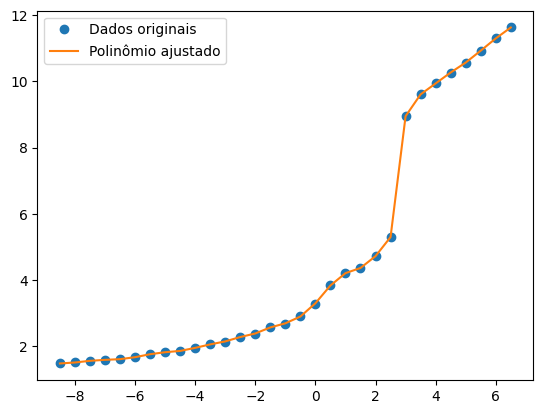

In [215]:
x = [-8.5,-8,-7.5,-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5]
y = [1.48,1.51,1.56,1.59,1.61,1.67,1.76,1.82,1.86,1.95,2.06,2.14,2.29,2.37,2.59,2.67,2.92,3.28,3.85,4.2,4.37,4.72,5.3,8.95,9.61,9.94,10.27,10.57,10.93,11.3,11.63]
draw_polynomial_interpolation_curve(x, y, len(x))

km = 9.997098666361986e-06
Vmáx = 44.63223267896916
Coeficientes: [2.23988317e-07 2.24053322e-02]
Raízes: [-100029.02175656]
Pontos de inflexão: []
Valores de p nos pontos de inflexão: []


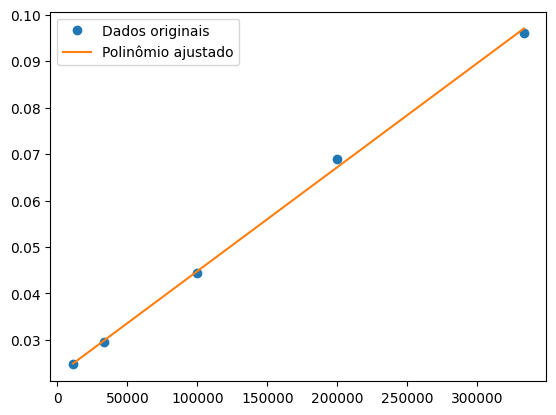

km = 3.0056001396936733e-05
Vmáx = 45.10599075622182
Coeficientes: [6.66341675e-07 2.21700041e-02]
Raízes: [-33271.22549648]
Pontos de inflexão: []
Valores de p nos pontos de inflexão: []


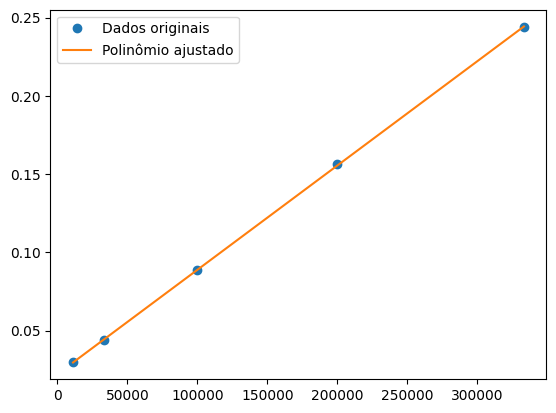

In [216]:
ics = list_map([0.3e-5, 0.5e-5, 1e-5, 3e-5, 9e-5], inversion)
iv_no_i = list_map([10.4,14.5, 22.5, 33.8, 40.5], inversion)
iv_with_i = list_map([4.1, 6.4, 11.3, 22.6, 33.8], inversion)
# draw_polynomial_interpolation_curve(ics, iv_no_i, len(ics) - 1)
# draw_polynomial_interpolation_curve(ics, iv_with_i, len(ics) - 1)
print(f"km = {(-1)/(-100029.02175656)}")
print(f"Vmáx = {1/2.24053322e-02}")
draw_polynomial_interpolation_curve(ics, iv_no_i, 1)
print(f"km = {(-1)/(-33271.22549648)}")
print(f"Vmáx = {1/2.21700041e-02}")
draw_polynomial_interpolation_curve(ics, iv_with_i, 1)